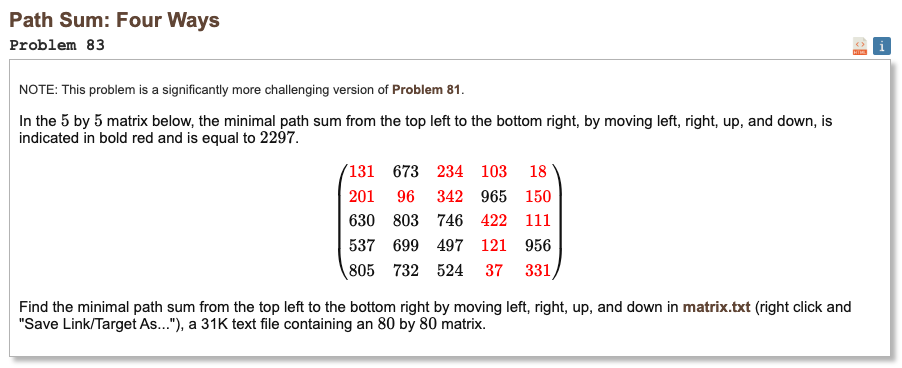

## Initial approach

Remember the solution of Problem 82.
```python

import numpy as np

matrix = np.loadtxt("0082_matrix.txt", delimiter=",", dtype=int)
n = matrix.shape[0]

for col in range(n - 2, -1, -1):
    temp = matrix[:, col] + matrix[:, col + 1]
    for row in range(1, n):
        temp[row] = min(temp[row], temp[row - 1] + matrix[row, col])
    for row in range(n - 2, -1, -1):
        temp[row] = min(temp[row], temp[row + 1] + matrix[row, col])
    matrix[:, col] = temp

print(np.min(matrix[:, 0]))
```

Problem 82: move only right (with up/down)
Problem 83: move freely in 4 directions

In [1]:
import numpy as np

matrix = np.loadtxt("0083_matrix.txt", delimiter=",", dtype=int)
n = matrix.shape[0]

dist = np.full((n, n), np.inf)
dist[0, 0] = matrix[0, 0]
visited = np.zeros((n, n), dtype=bool)

* visited is a matrix that shows which cells are already used
* it has True value for visited cells
* so, lets use mask to show the cells we have not visited yet

In [2]:
while True:
    mask = ~visited
    if not np.any(mask):
        break

    min_index = np.argmin(np.where(mask, dist, np.inf))
    x, y = divmod(min_index, n)

    visited[x, y] = True

    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < n and 0 <= ny < n and not visited[nx, ny]:
            new_cost = dist[x, y] + matrix[nx, ny]
            if new_cost < dist[nx, ny]:
                dist[nx, ny] = new_cost



* (-1, 0) move up
* (1, 0) move down
* (0, -1) move left
* (0, 1) move right

and...

* dx, dy is the direction you want to move
* nx and ny is the new position after moving

In [3]:
print("Result:", int(dist[-1, -1]))

Result: 425185
